# Project : Airline on-time performance (exploratory analysis)

<a id="toc"></a>

## Table of Contents

* [Introduction](#intro)
* [Preliminary Data Wrangling](#wrangling)
* [Exploratory Data Analysis](#eda)
* [Conclusions](#conclusions)

<a id="intro"></a>

[TOC](#intro)               
## Introduction

We are going to investigate flight datasets in order to gain insights on airline on-time performance from 2005 to 2008. The goal is to understand reasons that tend to make a flight delayed or cancelled. In particular, we will be intersted in the following key questions:





* Are there certain destination or arrival cities that are home to more delays or cancellations?
* What are the preferred times for flights to occur? 
* Are there any changes over multiple years?

* When is the best time of day/day of week/time of year to fly to minimise delays?
* Do older planes suffer more delays?
* How does the number of people flying between different locations change over time?
* How well does weather predict plane delays?
* Can we detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?
* What are the flight patterns 

---------------------------------------
hich factors are most likely to be the root of a delays ? (computing the total delays per factor)
Is there a relationship between delay and : company ? plane ? city ? continent ?
Which factors are most likely to be the root of a delays for a given company ? for a given plane ? (computing the total delays per factor)
How does the number of passengers/seats on a flight may impact its delay ?
How does the weather report impact flights delay ? (globally ? per company ?)
Which are the company that encounter more delay ?
Which are the departure that encounter more delay ?
Does the age of the planes impact its delay ?
Which days of the week  encounter more delay ? (to be answered by origin and by destination) ; do the same thing for the months of the year
Compare the companies on-time performance over the years
Which companies computed the most CarrierDelay ?
Which cities computed the most WeatherDelay ? (globally ? per company ?)
Which companies computed the most delay ? (sum up all delays for each observation)
Explore the departure delays. (per company; per plane; per plane model; per plane age; per plane manufacturer; per city; per weither )
Is the flight distance somehow correlated to the delay ? (the longer the distance, the longer the delay ?)
How does the flights cancellation are distributed ? (over the months ? over the companies ? over the reasons ?)
How does the flights cancellation evolved ? (generally ? per company ?)




> **Report date : February 2023**     
> **Written by : [Ekoue LOGOSU-TEKO](https://www.linkedin.com/in/ekouelogosuteko/?locale=en_US)**



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from dateutil.parser import parse
from datetime import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


<a id="wrangling"></a>

## Preliminary Data Wrangling
[TOC](#intro)          

### General Properties                
Our main data come from 04 different datasets, each one targeting a particular year, from 2005 to 2008. We will load each of them.

In [2]:
flight_df_05 = pd.read_csv("./datasets/2005.csv")
flight_df_05.head().T

,0,1,2,3,4
Year,2005,2005,2005,2005,2005
Month,1,1,1,1,1
DayofMonth,28,29,30,31,2
DayOfWeek,5,6,7,1,7
DepTime,1603.0,1559.0,1603.0,1556.0,1934.0
CRSDepTime,1605,1605,1610,1605,1900
ArrTime,1741.0,1736.0,1741.0,1726.0,2235.0
CRSArrTime,1759,1759,1805,1759,2232
UniqueCarrier,UA,UA,UA,UA,UA
FlightNum,541,541,541,541,542


In [3]:
flight_df_06 = pd.read_csv("./datasets/2006.csv")
flight_df_06.head().T

,0,1,2,3,4
Year,2006,2006,2006,2006,2006
Month,1,1,1,1,1
DayofMonth,11,11,11,11,11
DayOfWeek,3,3,3,3,3
DepTime,743.0,1053.0,1915.0,1753.0,824.0
CRSDepTime,745,1053,1915,1755,832
ArrTime,1024.0,1313.0,2110.0,1925.0,1015.0
CRSArrTime,1018,1318,2133,1933,1015
UniqueCarrier,US,US,US,US,US
FlightNum,343,613,617,300,765


In [4]:
flight_df_07 = pd.read_csv("./datasets/2007.csv")
flight_df_07.head().T

,0,1,2,3,4
Year,2007,2007,2007,2007,2007
Month,1,1,1,1,1
DayofMonth,1,1,1,1,1
DayOfWeek,1,1,1,1,1
DepTime,1232.0,1918.0,2206.0,1230.0,831.0
CRSDepTime,1225,1905,2130,1200,830
ArrTime,1341.0,2043.0,2334.0,1356.0,957.0
CRSArrTime,1340,2035,2300,1330,1000
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,2891,462,1229,1355,2278


In [5]:
flight_df_08 = pd.read_csv("./datasets/2008.csv")
flight_df_08.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,1343.0,1125.0,2009.0,903.0,1423.0
CRSDepTime,1325,1120,2015,855,1400
ArrTime,1451.0,1247.0,2136.0,1203.0,1726.0
CRSArrTime,1435,1245,2140,1205,1710
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,588,1343,3841,3,25


In [6]:
flight_df_05.shape

(7140596, 29)

We have 29 features, whose signification we obtained through a search over [the net](https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D) :
* **Year**: year (e.g. 2008)

* **Month**: 1-12 

* **DayofMonth**: 1-31

* **DayOfWeek**: 1 (Monday) - 7 (Sunday)

* **DepTime**: Actual departure time (local, hhmm).

* **CRSDepTime**: Scheduled departure time (local, hhmm).

* **ArrTime**: Actual arrival time (local, hhmm).

* **CRSArrTime**: Scheduled arrival time (local, hhmm).

* **UniqueCarrier**: Unique Carrier Code. It is the Carrier Code most recently used by a carrier. A numeric suffix is used to distinguish duplicate codes, for example, PA, PA (1), PA (2). This field is to be used to perform analysis of data reported by one and only one carrier.

* **FlightNum**: A one to four character alpha-numeric code for a particular flight.

* **TailNum**: Plane tail number; aircraft registration, unique aircraft identifier.

* **CRSElapsedTime**: Scheduled elapsed time computed from gate departure time to gate arrival time. In minutes.

* **ActualElapsedTime**: elapsed time computed from gate departure time to gate arrival time. In minutes.

* **AirTime**: The time spent by the plane in the air. In minutes.

* **ArrDelay**: Arrival delay of the flight, in minutes. Arrival delay equals the difference of the actual arrival time minus the scheduled arrival time. A flight is considered on-time when it arrives less than 15 minutes after its published arrival time.

* **DepDelay**: Departure delay of the flight, in minutes. It is the difference between the scheduled departure time and the actual departure time from the origin airport gate.

* **Origin**: Origin IATA airport code. Supposedly, this is the origin airport.

* **Dest**: Destination IATA airport code. Supposedly, this is the destination airport.

* **Distance**: The distance of the flight. In miles.


* **TaxiIn**: Taxi-in time, in minutes. The time elapsed between wheels down and arrival at the destination airport gate.

* **TaxiOut**: Taxi-out time, in minutes. The time elapsed between departure from the origin airport gate and wheels off.

* **Cancelled**: A flight that was listed in a carrier's computer reservation system during the seven calendar days prior to scheduled departure but was not operated.

* **CancellationCode**: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

* **Diverted**: 1 = yes, 0 = no. Indicate whether or not a flight was required to land at a destination other than the original scheduled destination for reasons beyond the control of the pilot/company.

* **CarrierDelay**: In minutes. Carrier delay record the delays that are within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.

* **WeatherDelay**: In minutes. Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

* **NASDelay**: In minutes. Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.

* **SecurityDelay**: In minutes. Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

* **LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.
          
          

*Note* : CRS stand for Computer Reservation System. CRS provide information on airline schedules, fares and seat availability to travel agencies and allow agents to book seats and issue tickets.

A quick observation : we have our main data separated over 04 datasets, we will later fuse them together as a whole in one dataframe.

We also have complementary datasets, which give informations about variables in the main datasets.

In [7]:
# Load freight companies data
carrier_df = pd.read_csv("./datasets/carriers.csv")
carrier_df.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [8]:
# Load planes data
plane_df = pd.read_csv("./datasets/plane-data.csv")
plane_df

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [9]:
plane_df["manufacturer"].unique()

array([nan, 'EMBRAER', 'AIRBUS INDUSTRIE', 'BOEING', 'DOUGLAS',
       'MCDONNELL DOUGLAS', 'CANADAIR', 'BOMBARDIER INC', 'AIRBUS',
       'CESSNA', 'SAAB-SCANIA', 'BEECH', 'SIKORSKY',
       'GULFSTREAM AEROSPACE', 'AEROSPATIALE', 'PIPER', 'AGUSTA SPA',
       'AERO COMMANDER', 'PAIR MIKE E', 'AVIAT AIRCRAFT INC', 'RAVEN',
       'DEHAVILLAND', 'WOBIG WAYNE R', 'BELL', 'FREDERICK CHRIS K',
       'FRIEDEMANN JON', 'STINNETT RON', 'HELIO', 'LEBLANC GLENN T',
       'MARZ BARRY', 'MORSE GEORGE JR', 'AEROSPATIALE/ALENIA',
       'BAUMAN RANDY', 'DIAMOND AIRCRAFT IND INC', 'BOEING OF CANADA LTD',
       'MCDONNELL DOUGLAS CORPORATION', 'MCDONNELL DOUGLAS AIRCRAFT CO',
       'COBB INTL/DBA ROTORWAY INTL IN', 'AERONCA', 'MAULE'], dtype=object)

In [26]:
# Load airports data
airport_df = pd.read_csv("./datasets/airports.csv")
airport_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


Our analysis will be focused on the features of our main datasets, while the secondary datasets are only here to provide additional information to our work when necessary (e.g. we don't want to put in a plot the ID of an airport instead of its name).

Let's first fuse the content of our main datasets.

In [11]:
# Observing the shape of the datasets from each year
flight_df_05.shape, flight_df_06.shape, flight_df_07.shape, flight_df_08.shape

((7140596, 29), (7141922, 29), (7453215, 29), (2389217, 29))

We will take note of the fact that the data of 2008 is little compared to the others years.

In [12]:
# Fusing the datasets from each year so that our data become a whole
flight_df = pd.concat([flight_df_05,flight_df_06,flight_df_07,flight_df_08],ignore_index=True)
flight_df.shape

(24124950, 29)

### Getting an overview of the data structure

In [13]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24124950 entries, 0 to 24124949
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay    

In [14]:
# Check N/A values count for each variable
flight_df.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                480854
CRSDepTime                  0
ArrTime                533901
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 42474
ActualElapsedTime      533901
CRSElapsedTime           1405
AirTime                533901
ArrDelay               533901
DepDelay               480854
Origin                      0
Dest                        0
Distance                    0
TaxiIn                  70096
TaxiOut                 64442
Cancelled                   0
CancellationCode     23644094
Diverted                    0
CarrierDelay          1804634
WeatherDelay          1804634
NASDelay              1804634
SecurityDelay         1804634
LateAircraftDelay     1804634
dtype: int64

In [15]:
# Check null values count for each variable
flight_df.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                480854
CRSDepTime                  0
ArrTime                533901
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 42474
ActualElapsedTime      533901
CRSElapsedTime           1405
AirTime                533901
ArrDelay               533901
DepDelay               480854
Origin                      0
Dest                        0
Distance                    0
TaxiIn                  70096
TaxiOut                 64442
Cancelled                   0
CancellationCode     23644094
Diverted                    0
CarrierDelay          1804634
WeatherDelay          1804634
NASDelay              1804634
SecurityDelay         1804634
LateAircraftDelay     1804634
dtype: int64

N/A check and null check are giving the same result, so there is nothing to worry about there underlying content

In [16]:
flight_df.head().T

,0,1,2,3,4
Year,2005,2005,2005,2005,2005
Month,1,1,1,1,1
DayofMonth,28,29,30,31,2
DayOfWeek,5,6,7,1,7
DepTime,1603.0,1559.0,1603.0,1556.0,1934.0
CRSDepTime,1605,1605,1610,1605,1900
ArrTime,1741.0,1736.0,1741.0,1726.0,2235.0
CRSArrTime,1759,1759,1805,1759,2232
UniqueCarrier,UA,UA,UA,UA,UA
FlightNum,541,541,541,541,542


In [17]:
flight_df.shape

(24124950, 29)

In [18]:
# flight_df.dropna(inplace=True)
# flight_df.shape

One thing to note is that there are some time data under one or two digit, instead of four digits. For example, `55` or `7`. Such an entry should originally be prefixed by `0`s under their string form, before having the `0`s removed when they were parsed to int. For example `0055` or `0007` which will stand for `00:05` and `00:07`.           
And example of such an entry is in the next cell. We will take note of that case so that we take the appropriate steps when working on the time related variables.

In [19]:
flight_df.iloc[166,:]

Year                   2005
Month                     1
DayofMonth                5
DayOfWeek                 3
DepTime                55.0
CRSDepTime             2115
ArrTime               309.0
CRSArrTime             2319
UniqueCarrier            UA
FlightNum               546
TailNum              N819UA
ActualElapsedTime      74.0
CRSElapsedTime         64.0
AirTime                42.0
ArrDelay              230.0
DepDelay              220.0
Origin                  ORD
Dest                    DAY
Distance                240
TaxiIn                  4.0
TaxiOut                28.0
Cancelled                 0
CancellationCode        NaN
Diverted                  0
CarrierDelay            0.0
WeatherDelay           44.0
NASDelay               10.0
SecurityDelay           0.0
LateAircraftDelay     176.0
Name: 166, dtype: object

There is another thing to take not of : `DepDelay` computed the difference in minute between `DepTime` and `CRSDepTime`; but sometimes, there are discordance between `DepDelay` and the sum of `CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay`.                            

This may be related to the fact that not all delay reasons are recorded in our dataset. An example of such case is illustrated in the next cell.

In [16]:
# Example of flights were there are discordance between DepDelay and the sum of delay reasons
flight_df.loc[[4,5,6,7,10],["DepTime","CRSDepTime","DepDelay","CarrierDelay","WeatherDelay",
                            "NASDelay","SecurityDelay","LateAircraftDelay"]].T

,4,5,6,7,10
DepTime,1934.0,2042.0,2046.0,2110.0,1917.0
CRSDepTime,1900.0,1900.0,1900.0,1900.0,1900.0
DepDelay,34.0,102.0,106.0,130.0,17.0
CarrierDelay,0.0,23.0,46.0,16.0,17.0
WeatherDelay,0.0,0.0,0.0,0.0,0.0
NASDelay,0.0,0.0,0.0,0.0,0.0
SecurityDelay,0.0,0.0,0.0,0.0,0.0
LateAircraftDelay,0.0,74.0,39.0,89.0,0.0


In order to avoid our analyzes being contradictory, we will later create a new feature named `OtherDelay`, which will record the missing minute to make the sum of delay reasons concordant with DepDelay.

**Data Overview conclustion** :      
* We have 24124950 samples for 29 variables. 
* Dropping the null values in our main dataset let us with only 2 remaining samples. So we will focus on dropping samples which have null value related to delay variables, which will hopefully let us with a good number of data to work with.   
* New datetime variables, such as `DepDate` and `ArrDate`, should be created based on the existing date and time variables in the dataset so that our future datetime based operations are easier and cleaner.

### Data cleaning


Since our work will revolve around on-time performance, we will remove all samples whose delay observations are missing.

In [ ]:
flight_df.dropna(subset=["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"] ,inplace=True)
flight_df.shape

In [ ]:
flight_df.dropna(subset=["ArrDelay","DepDelay"] ,inplace=True)
flight_df.shape

In [ ]:
flight_df.isna().sum()

Nearlly all information in CancellationCode is N/A. So I will drop this feature.

In [ ]:
flight_df.shape

In [ ]:
flight_df.drop(["CancellationCode"],axis=1,inplace=True)
flight_df.shape

In [ ]:
flight_df.isna().sum()

Only one plane doesn't have a tail-number in our dataset. We shall drop it.

In [ ]:
flight_df.dropna(inplace=True)
flight_df.shape

In [ ]:
flight_df.isnull().sum()

In [ ]:
# Check for duplicate values
flight_df.duplicated().sum()

In [ ]:
# Drop duplicate values
flight_df.drop_duplicates(inplace=True)

In [ ]:
# Confirm that duplicate values were removed
flight_df.duplicated().sum()

In [ ]:
flight_df["DepTime"].value_counts()

In [ ]:
# Convert DepTime variable to int (to remove decimal), then to string (to facilitate future datetime engineering)
flight_df["DepTime"] = flight_df["DepTime"].astype(int).astype(str)

In [ ]:
# Convert CRSDepTime variable to string (to facilitate future datetime engineering)
flight_df["CRSDepTime"] = flight_df["CRSDepTime"].astype(str)

In [ ]:
# Convert ArrTime variable to int (to remove decimal), then to string (to facilitate future datetime engineering)
flight_df["ArrTime"] = flight_df["ArrTime"].astype(int).astype(str)

In [ ]:
# Convert CRSArrTime variable to string (to facilitate future datetime engineering)
flight_df["CRSArrTime"] = flight_df["CRSArrTime"].astype(str)

In [ ]:
flight_df.info()

In [ ]:
# flight_df["DepTime_"] = flight_df["DepTime"][:2]+":"+flight_df["DepTime"][2:]
# flight_df.head().T

In [ ]:
# flight_df.reset_index(inplace=True)

In [ ]:
# datetime_str = "09-19-2022 13:55"
# datetime.strptime(datetime_str,"%m-%d-%Y %H:%M")

In [ ]:
time = "1305"
time[:2] + ":"+time[2:]

In [ ]:
datetime_str = "{}-{}-{} {}".format(1,21,2005,"13:05")
datetime.strptime(datetime_str,"%m-%d-%Y %H:%M") # df.loc[index,new_datetime_column] =

In [ ]:
# flight_df.query("Month=={} &  DayofMonth=={} &  Year=={} & DepTime=={}".format(1,21,2005,"1305"))

In [ ]:
# flight_df.iloc[165:167,:]

In [ ]:
flight_df.query("index==166").T

In [ ]:
flight_df.head().T

In [ ]:
# time="55"
# if len(time)<4:
#     diff = 4-len(time)
#     time = "0"*diff+time
# time

In [ ]:
def engineer_datetime_feature(df:pd.DataFrame, new_datetime_column:str, time_column:str, 
                              month_column="Month", day_column="DayofMonth", year_column:str="Year",
                              verbose=False)->pd.DataFrame:
    
    # Create new column (the column to hold the datetime data)
    df[new_datetime_column] = np.nan 
    
    print("Dataset shape : {}".format(df.shape))
    print("---------"*3)
    
    # Iterate over each sample in the dataset
    for index,row in df.iterrows(): 
        print("Processing row index : {} ".format(index))
#         print(row)
#         print("..."*2)
#         print(row["popularity"])
#         print("..."*2)
#         print(index)
#         print("---"*8)

        # Retrieve date sub-informations from the related variables
        month = row[month_column]
        day = row[day_column]
        year = row[year_column]
        
        time=row[time_column]
        # Put 0 at the start of time which lenght are < 4 (because this error should be the result of parsing the time to int)
        if len(time)<4:
            diff = 4-len(time)
            time = "0"*diff+time
        
        # Put a semi-column to format time properly
        time = "{}:{}".format(time[:2], time[2:])  
        
        
        datetime_str = "{}-{}-{} {}".format(month,day,year,time)
        df.loc[index,new_datetime_column] = datetime.strptime(datetime_str,"%m-%d-%Y %H:%M") 
    
    print("Processed all rows")
    
    return df

In [ ]:
# TODO : uncomment and run the code below ??

# flight_df = engineer_datetime_feature(flight_df, new_datetime_column="DepDateTime", time_column="DepTime")
flight_df.head(3).T

In [2]:
saved_datasets_folder="datasets/saved"

In [3]:
# TODO : comment code in this cell before submiting the work

# Save the dataset, so that I am not required to re-run all the previous cells when I resume the work after a break
flight_df.to_csv("{}/flight_df.csv".format(saved_datasets_folder),index=False)

NameError: name 'flight_df' is not defined

In [3]:
# TODO : comment code in this cell before submiting the work
flight_df = pd.read_csv("{}/flight_df.csv".format(saved_datasets_folder))
flight_df.head(3).T

,0,1,2
Year,2005,2005,2005
Month,1,1,1
DayofMonth,28,29,30
DayOfWeek,5,6,7
DepTime,1603,1559,1603
CRSDepTime,1605,1605,1610
ArrTime,1741,1736,1741
CRSArrTime,1759,1759,1805
UniqueCarrier,UA,UA,UA
FlightNum,541,541,541


#### Creating `DepDate` feature

In [ ]:
flight_df.head(3).T

<a id="eda"></a>

[TOC](#intro)               
## Exploratory Data Analysis

<a id="delay-root"></a>
### Which factors are most likely to be the root of a delays ?

First things first. Since we are trying to understand the on-time performance of flights, let us first get an idea of the reasons which are most likely to make a plane being late. This may give us more idea on what to explore later.            
In order to accomplish our goal, we will retrieve a sub dataset of flights which were late on their schedule.

Recalling two features of our dataset :
* **ArrDelay**: Arrival delay of the flight, in minutes. Arrival delay equals the **difference of the actual arrival time minus the scheduled arrival time**. A flight is considered on-time when it arrives less than 15 minutes after its published arrival time.

* **DepDelay**: Departure delay of the flight, in minutes. It is the **difference between the scheduled departure time and the actual departure time** from the origin airport gate.


This mean a negative delay stand for a flight that arrived ahead of the scheduled time, while a positive delay mean a flight that is late.

In [ ]:
# datetime_str1 = "{}-{}-{} {}".format(1,21,2005,"13:05")
# date1 = datetime.strptime(datetime_str1,"%m-%d-%Y %H:%M") 

# datetime_str2 = "{}-{}-{} {}".format(1,21,2005,"13:15")
# date2 = datetime.strptime(datetime_str2,"%m-%d-%Y %H:%M") 
# diff = date1 - date2
# diff2 = date2-date1

# diff

In [ ]:
# diff.min

In [ ]:
# diff.total_seconds()

In [ ]:
# diff2.total_seconds()

In [ ]:
# diff.seconds

We will retrieve flight which arrival or departure where delayed. For the departure, we will consider 10 min as the threshold for delay.

In [4]:
# Retrieve delayed flights data
delayed_flight_df = flight_df.query("ArrDelay >= 15 | DepDelay >= 10")
print(delayed_flight_df.shape)
delayed_flight_df.head(10).T

(6875092, 28)


,4,5,6,7,10,11,12,13,14,17
Year,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005
Month,1,1,1,1,1,1,1,1,1,1
DayofMonth,2,3,4,6,10,11,12,13,14,19
DayOfWeek,7,1,2,4,1,2,3,4,5,3
DepTime,1934,2042,2046,2110,1917,1935,2038,2106,1919,1939
CRSDepTime,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
ArrTime,2235,9,2357,8,2240,2259,18,9,2228,2348
CRSArrTime,2232,2232,2232,2223,2223,2223,2223,2223,2223,2223
UniqueCarrier,UA,UA,UA,UA,UA,UA,UA,UA,UA,UA
FlightNum,542,542,542,542,542,542,542,542,542,542


We have 5 delays reason:
* **CarrierDelay**: In minutes. Carrier delay record the delays that are within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.

* **WeatherDelay**: In minutes. Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

* **NASDelay**: In minutes. Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.

* **SecurityDelay**: In minutes. Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

* **LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

* **OtherDelay** in minutes : Delays which are not part of the above mentioned ones.

             
We will work based those variables.

In [5]:
# .groupby(["CarrierDelay","WeatherDelay","NASDelay",
#                                                       "SecurityDelay","LateAircraftDelay"]) \
                                           

In [6]:
delay_variables = ["CarrierDelay","WeatherDelay","NASDelay", "SecurityDelay","LateAircraftDelay"]
delay_variables

['CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [7]:
delayed_flight_df["OtherDelay"] = delayed_flight_df["DepDelay"] - delayed_flight_df[delay_variables].sum(axis=1)
delayed_flight_df[["DepDelay"]+delay_variables+["OtherDelay"]].head(15).T

<ipython-input-7-27b2df3df7ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_flight_df["OtherDelay"] = delayed_flight_df["DepDelay"] - delayed_flight_df[delay_variables].sum(axis=1)


,4,5,6,7,10,11,12,13,14,17,18,19,27,28,29
DepDelay,34.0,102.0,106.0,130.0,17.0,35.0,98.0,126.0,19.0,39.0,148.0,13.0,101.0,29.0,221.0
CarrierDelay,0.0,23.0,46.0,16.0,17.0,0.0,18.0,13.0,0.0,10.0,32.0,0.0,0.0,0.0,0.0
WeatherDelay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NASDelay,0.0,0.0,0.0,0.0,0.0,1.0,17.0,0.0,0.0,46.0,0.0,0.0,111.0,35.0,199.0
SecurityDelay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LateAircraftDelay,0.0,74.0,39.0,89.0,0.0,35.0,80.0,93.0,0.0,29.0,106.0,0.0,0.0,0.0,0.0
OtherDelay,34.0,5.0,21.0,25.0,0.0,-1.0,-17.0,20.0,19.0,-46.0,10.0,13.0,-10.0,-6.0,22.0


In [8]:
delay_variables+=["OtherDelay"]
delay_variables

['CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'OtherDelay']

In [9]:
delayed_flight_df[["DepDelay"]+delay_variables].describe()

,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OtherDelay
count,6.875092e+06,6.875092e+06,6.875092e+06,6.875092e+06,6.875092e+06,6.875092e+06,6.875092e+06
mean,3.981223e+01,1.217643e+01,2.476304e+00,1.269850e+01,8.528715e-02,1.580643e+01,-3.430730e+00
std,5.152879e+01,3.476052e+01,1.657026e+01,2.732032e+01,2.077138e+00,3.455902e+01,2.234997e+01
min,-1.200000e+03,0.000000e+00,0.000000e+00,-4.900000e+01,0.000000e+00,0.000000e+00,-1.602000e+03
25%,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.400000e+01
50%,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,5.000000e+01,1.100000e+01,0.000000e+00,1.600000e+01,0.000000e+00,1.800000e+01,1.100000e+01
max,2.601000e+03,2.580000e+03,1.510000e+03,1.392000e+03,3.920000e+02,1.366000e+03,2.250000e+02


The negative value of `OtherDelay` should be related to how `DepDelay` and the other delay reasons are computed (rounded); say delay can be recored by increment of 5min, otherwise 0 will be applied.                      
Since we don't know the specific rules to record each delay reason, we will avoid using `OtherDelay` in our analyzes.      
We will record the case here as a limitation in our work.

In [10]:
# Remove "OtherDelay" from our variables

print(delayed_flight_df.shape)
delayed_flight_df.drop(["OtherDelay"],axis=1,inplace=True)
delayed_flight_df.shape

(6875092, 29)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(6875092, 28)

In [11]:
delay_variables.remove("OtherDelay")

In [12]:
# Compute the sum of delays per reason
sum_of_delays_per_reason = delayed_flight_df[delay_variables] \
                          .sum() \
                          .sort_values(ascending=False)
sum_of_delays_per_reason

LateAircraftDelay    108670643.0
NASDelay              87303386.0
CarrierDelay          83714095.0
WeatherDelay          17024820.0
SecurityDelay           586357.0
dtype: float64

We can see that : 
* Most delays result from the ripple effect (late arrival of the same aircraft at a previous airport). 
* A fair amount of delays are also related to National Airspace System (NAS) and to the carrier itself.
* Delays related to security issues are little.

A plot will help us better observe how delays are distributed over reasons.

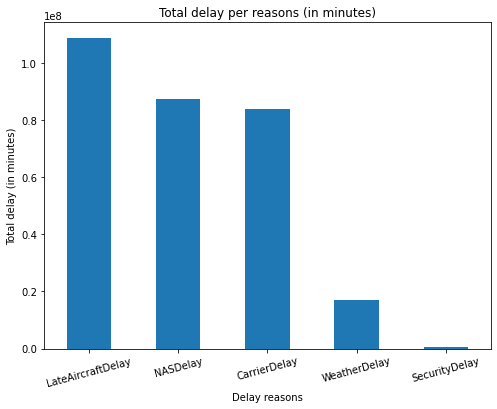

In [13]:
# Plot the sum of delays per reason
sum_of_delays_per_reason.plot(kind="bar", figsize=(8,6))

plt.xlabel("Delay reasons")
plt.ylabel("Total delay (in minutes)")
plt.title("Total delay per reasons (in minutes)")

plt.xticks(rotation=15);

We can observe from the plot that :
* Most delays are related to the ripple effect
* NAS and the carrier itself are the next two reasons that induce delays
* Delays related to weather are minor, while delays related to security are practically non-existent

From those observations, we can have some sligh conclusions :
* It is possible to forcast the weather most of the time, so the flights schedule are done accordingly
* A plane being late on a schedule likely mean its previous flight was delayed (ripple effect)
* The root of a ripple effect (the first delay of the plane) should be related to NAS and/or carrier operations (cleaning, cargo loading, ...)

<a id="delay-mean-waiting"></a>
### How much should someone expect to way at an airport because of flight delay ?

We want to know here how much should someone expect to be delayed in general, and how much he should expect to be delayed because of a particular reason.

In [14]:
delayed_flight_df.head(5).T

,4,5,6,7,10
Year,2005,2005,2005,2005,2005
Month,1,1,1,1,1
DayofMonth,2,3,4,6,10
DayOfWeek,7,1,2,4,1
DepTime,1934,2042,2046,2110,1917
CRSDepTime,1900,1900,1900,1900,1900
ArrTime,2235,9,2357,8,2240
CRSArrTime,2232,2232,2232,2223,2223
UniqueCarrier,UA,UA,UA,UA,UA
FlightNum,542,542,542,542,542


We will know how much should someone expect to be delayed in general by referring to the mean delay.                  
We will use the delay reasons instead of `DepDelay` to work in order to keep the result consistent with "the mean delay per reason".

In [15]:
# General mean delay of a flight
mean_of_delays = delayed_flight_df[delay_variables].sum(axis=1).mean()
mean_of_delays

43.24295602153396

A scheduled flight is expected to be late on its departure by nearly one hour, assuming that all pre-flight activities are conducted sequentially and not in parallel. It is no wonder no one is happy to be stuck in an airport.                     
Let's observe how this mean delay is distribted over its reasons.

In [16]:
# General mean delay of a flight per reason
mean_of_delays_per_reason = delayed_flight_df[delay_variables].mean().sort_values(ascending=False)
mean_of_delays_per_reason

LateAircraftDelay    15.806427
NASDelay             12.698504
CarrierDelay         12.176433
WeatherDelay          2.476304
SecurityDelay         0.085287
dtype: float64

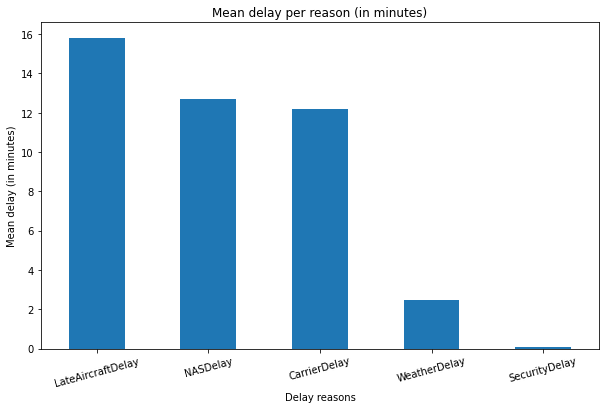

In [17]:
# Plot general mean delay of a flight per reason
mean_of_delays_per_reason.plot(kind="bar", figsize=(10,6))

plt.xlabel("Delay reasons")
plt.ylabel("Mean delay (in minutes)")
plt.title("Mean delay per reason (in minutes)")

plt.xticks(rotation=15);

We can conclude from our analysis here that if all pre-flight activities are conducted in parallel, we can expect a flight to be late by as much as 16min; while we should expect a delay of about 40min if pre-flight activities are conducted sequenctially.

Now let us try to understand if there is a relationship between delay and origin airport.

<a id="relationship-delay-origin"></a>
### Is there a relationship between delay and origin airport ?

We are interested in how delays are distributed over origin airports. We wish to know if each airport performs approximatively the same, or if there are diffenre in performance.

We will answer this question by understanding the mean delay per airport.

In [20]:
# Mean delay per airport
mean_delay_per_origin = delayed_flight_df[["DepDelay","Origin"]].groupby(["Origin"]).mean() \
                                                                  .sort_values(by="DepDelay",ascending=False)

mean_delay_per_origin

,DepDelay
Origin,
CMX,134.542373
OGD,108.000000
CYS,105.000000
ALO,85.742424
PLN,80.426667
...,...
RFD,28.982332
VIS,19.280702
YKM,18.587500


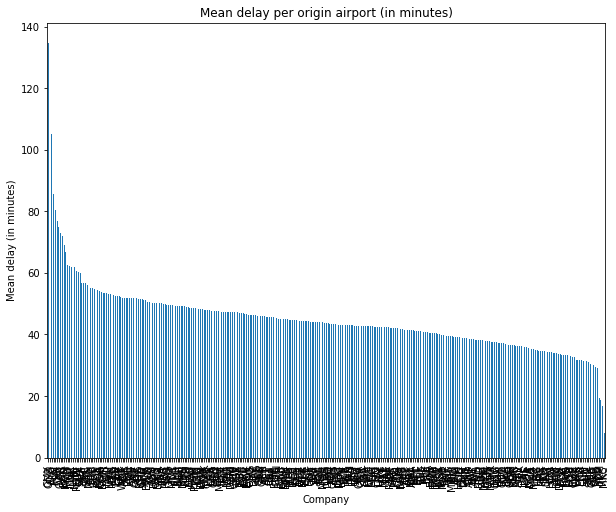

In [22]:
# Plot mean delay per airport
mean_delay_per_origin.plot(kind="bar", figsize=(10,8))

plt.xlabel("Company")
plt.ylabel("Mean delay (in minutes)")

plt.legend("", frameon=False) # Remove legend

plt.title("Mean delay per origin airport (in minutes)");

Despite the fact that the above plot doesn't tell us much about the concerned airports, it still allows us to see that there are airports which perform better than other. There are airport where delays revolve under 25-30 min, while there are other where delays are higher than 60min.                                         
So we can conclude here that **knowing the origin airport plays a role in knowing weither a flight will be late or not.**

With that knowledge, we will now explore which airports perform better and which ones perform the worst.

<a id="origin-performance-comparison"></a>
### How does airports perform compared to each others ?                                          
We will observe the airports which have less delay and the ones which have most delay.                           
The first step will be to add more information to our `mean_delay_per_origin` dataframe, so that we put the real name of the airports (and not their acronym) in our charts.                                    
Then we will make our plots.

In [24]:
mean_delay_per_origin

,DepDelay
Origin,
CMX,134.542373
OGD,108.000000
CYS,105.000000
ALO,85.742424
PLN,80.426667
...,...
RFD,28.982332
VIS,19.280702
YKM,18.587500


In [45]:
# Make the index become a column
mean_delay_per_origin.reset_index(inplace=True)
mean_delay_per_origin

,Origin,DepDelay
0,CMX,134.542373
1,OGD,108.000000
2,CYS,105.000000
3,ALO,85.742424
4,PLN,80.426667
...,...,...
310,RFD,28.982332
311,VIS,19.280702
312,YKM,18.587500
313,RKS,16.900000


In [38]:
airport_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [48]:
mean_delay_per_origin = mean_delay_per_origin.merge(airport_df, how="inner", left_on="Origin", right_on="iata")
mean_delay_per_origin

,Origin,DepDelay,iata,airport,city,state,country,lat,long
0,CMX,134.542373,CMX,Houghton County Memorial,Hancock,MI,USA,47.168417,-88.489061
1,OGD,108.000000,OGD,Ogden-Hinckley,Ogden,UT,USA,41.195944,-112.012175
2,CYS,105.000000,CYS,Cheyenne,Cheyenne,WY,USA,41.155723,-104.811838
3,ALO,85.742424,ALO,Waterloo Municipal,Waterloo,IA,USA,42.557081,-92.400344
4,PLN,80.426667,PLN,Pellston Regional of Emmet County,Pellston,MI,USA,45.570928,-84.796715
...,...,...,...,...,...,...,...,...,...
310,RFD,28.982332,RFD,Greater Rockford,Rockford,IL,USA,42.195364,-89.097211
311,VIS,19.280702,VIS,Visalia Municipal,Visalia,CA,USA,36.318667,-119.392889
312,YKM,18.587500,YKM,Yakima Air Terminal,Yakima,WA,USA,46.568170,-120.544059
313,RKS,16.900000,RKS,Rock Springs-Sweetwater County,Rock Springs,WY,USA,41.594217,-109.065193


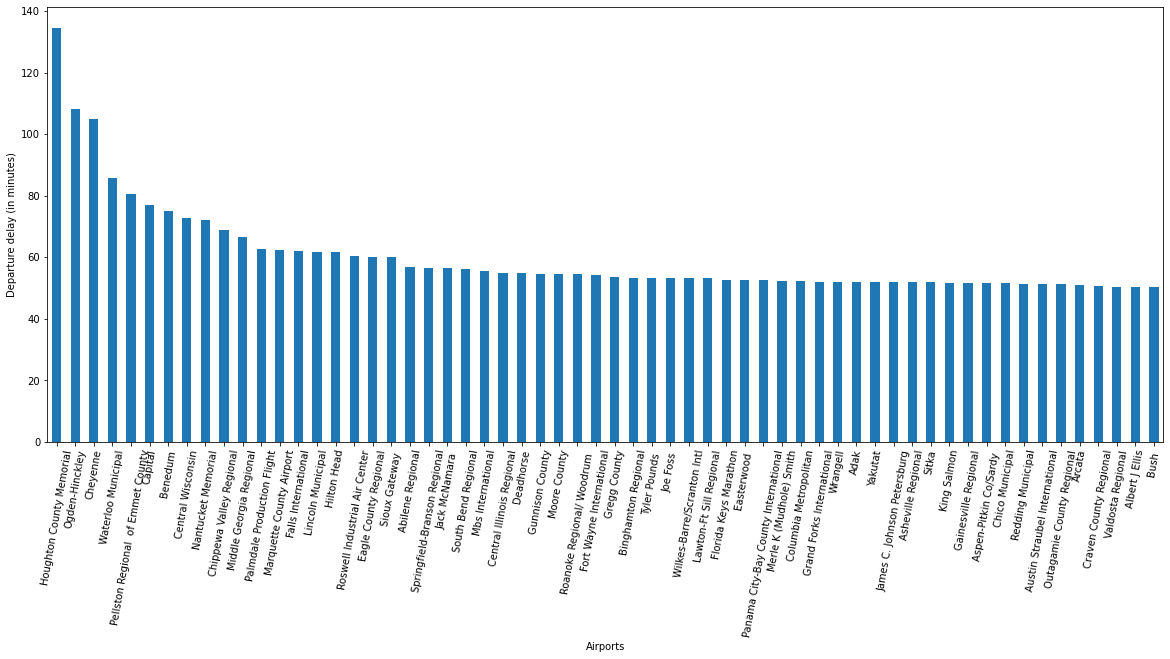

In [58]:
# Plot the top airports which have the worst performance in term of departure delay

mean_delay_per_origin.iloc[:60,:].plot(kind="bar",x="airport",y="DepDelay", figsize=(20,8))

plt.legend("", frameon=False) # Remove legend

plt.xlabel("Airports")
plt.ylabel("Departure delay (in minutes)")
plt.title("Airports with the worst performance in term of departure delay")

plt.xticks(rotation=80);

* The aiports with the worst on-time performance tend to have a delay starting from 01 hour to 01h30min.        
* The worst airport tend to have a delay over 02 hours, while the second and third worst tend to have a delay revolving around 01h40min.                             
If a passenger has to use the airports in the chart, he should plan for a least one hour delay in his agenda.

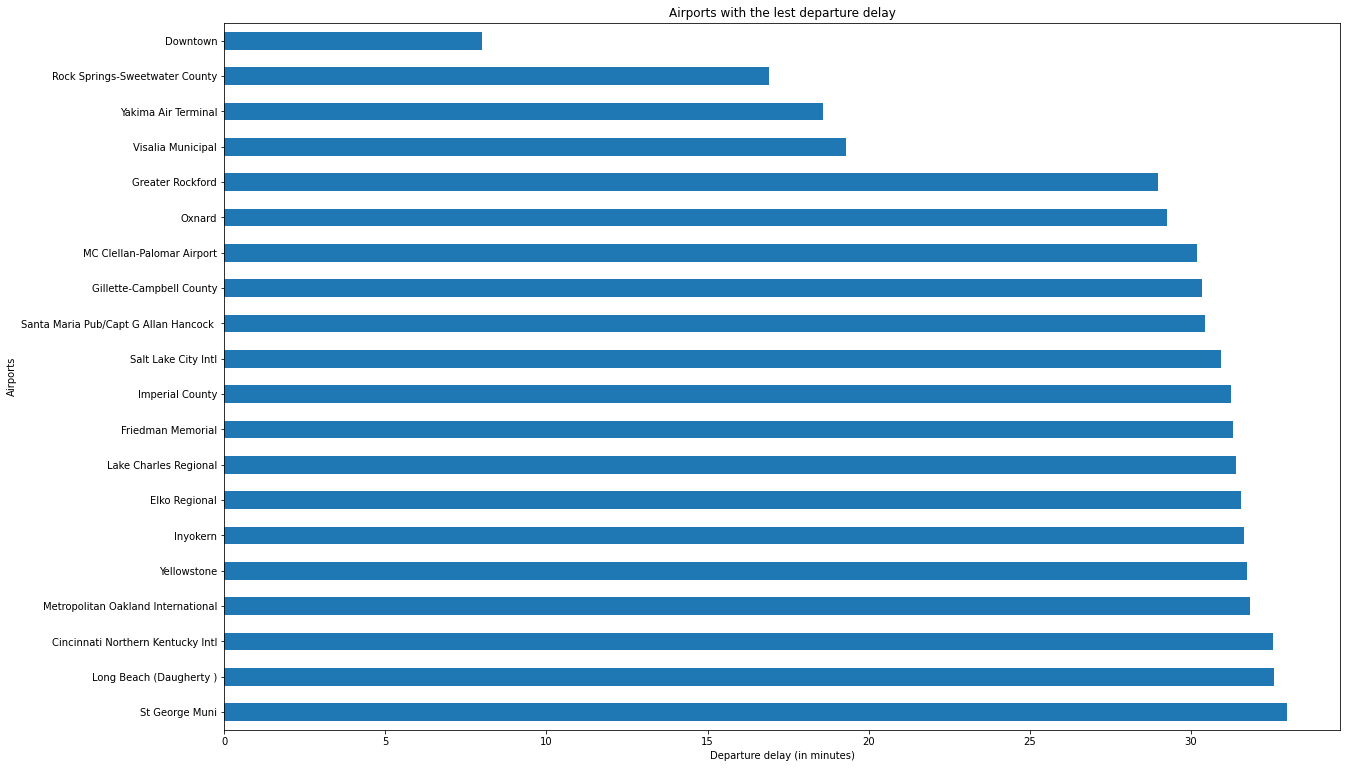

In [71]:
# Plot the airports which have the lest departure delay

# mean_delay_per_origin.iloc[-60:,:].plot(kind="bar",x="airport",y="DepDelay", figsize=(20,8))
# plt.xlabel("Airports")
# plt.ylabel("Departure delay (in minutes)")

mean_delay_per_origin.iloc[-20:,:].plot(kind="barh",x="airport",y="DepDelay", figsize=(20,13))

plt.legend("", frameon=False) # Remove legend

plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Airports")

plt.title("Airports with the lest departure delay");

# plt.xticks(rotation=85);

In general, we should expect a delay of around 30min in the airports that have the less delay.                 
The 03 best airports between those which tend to have the less delay have a delay starting from about 08minutes to less than 20min.

<a id="depdelay-vs-arrdelay"></a>
### Does departure delay imperatively imply arrival delay ?

The theoretic answer is yes, but we will still confirm it to be sure of things.

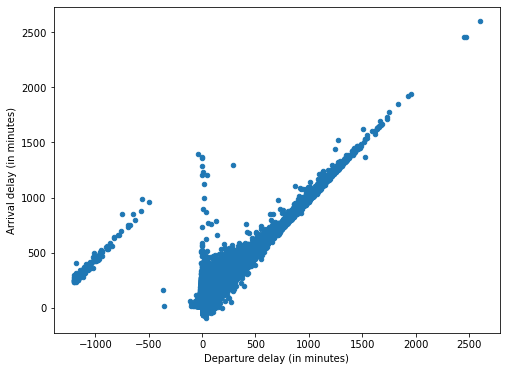

In [73]:
delayed_flight_df.plot(kind="scatter",x="DepDelay",y="ArrDelay", figsize=(8,6))

plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Arrival delay (in minutes)");

We are observing a linear relationship in the above plot. It tells that a departure delay has impacts on arrival delay.                 
Let's use make the plot better to see if we can gain more insights from it.

In [74]:
delayed_flight_df[ ["DepDelay","ArrDelay"] ].describe()

,DepDelay,ArrDelay
count,6.875092e+06,6.875092e+06
mean,3.981223e+01,4.435963e+01
std,5.152879e+01,5.220541e+01
min,-1.200000e+03,-9.200000e+01
25%,1.200000e+01,1.600000e+01
50%,2.400000e+01,2.800000e+01
75%,5.000000e+01,5.500000e+01
max,2.601000e+03,2.598000e+03


We will redo the same plot, while reviewing its axis limits.

In [ ]:
delayed_flight_df.plot(kind="scatter",x="DepDelay",y="ArrDelay", figsize=(8,6))

plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Arrival delay (in minutes)");

In [ ]:
////////////

In [44]:
# Retrieve the top_n airports which have the worst performance in term of departure delay
great_delay_df = mean_delay_per_origin.iloc[:top_n,:]
great_delay_df

,DepDelay
Origin,
CMX,134.542373
OGD,108.000000
CYS,105.000000
ALO,85.742424
PLN,80.426667
SPI,76.901205
CKB,75.000000
CWA,72.848195
ACK,72.071618


In [37]:
# Make the index become a column
great_delay_df.reset_index(inplace=True)
great_delay_df

,Origin,DepDelay
0,CMX,134.542373
1,OGD,108.000000
2,CYS,105.000000
3,ALO,85.742424
4,PLN,80.426667
5,SPI,76.901205
6,CKB,75.000000
7,CWA,72.848195
8,ACK,72.071618
9,EAU,69.000000


In [40]:
great_delay_df = great_delay_df.merge(airport_df, how="inner", left_on="Origin", right_on="iata")
great_delay_df

,Origin,DepDelay,iata,airport,city,state,country,lat,long
0,CMX,134.542373,CMX,Houghton County Memorial,Hancock,MI,USA,47.168417,-88.489061
1,OGD,108.000000,OGD,Ogden-Hinckley,Ogden,UT,USA,41.195944,-112.012175
2,CYS,105.000000,CYS,Cheyenne,Cheyenne,WY,USA,41.155723,-104.811838
3,ALO,85.742424,ALO,Waterloo Municipal,Waterloo,IA,USA,42.557081,-92.400344
4,PLN,80.426667,PLN,Pellston Regional of Emmet County,Pellston,MI,USA,45.570928,-84.796715
5,SPI,76.901205,SPI,Capital,Springfield,IL,USA,39.843952,-89.677619
6,CKB,75.000000,CKB,Benedum,Clarksburg,WV,USA,39.296639,-80.228083
7,CWA,72.848195,CWA,Central Wisconsin,Mosinee,WI,USA,44.777619,-89.666779
8,ACK,72.071618,ACK,Nantucket Memorial,Nantucket,MA,USA,41.253052,-70.060181
9,EAU,69.000000,EAU,Chippewa Valley Regional,Eau Claire,WI,USA,44.865257,-91.485072


<AxesSubplot:xlabel='airport'>

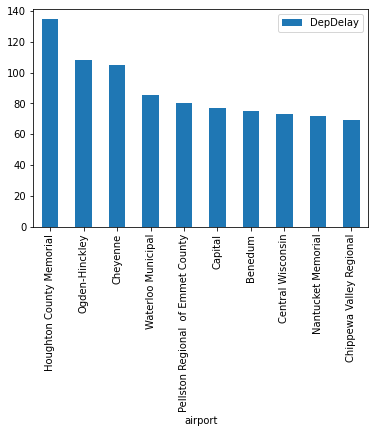

In [43]:
great_delay_df.plot(kind="bar",x="airport",y="DepDelay")

<BarContainer object of 10 artists>

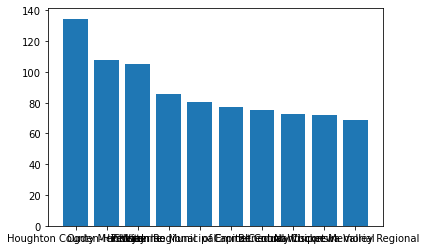

In [42]:
plt.bar(data=small_delay_df, x="airport",height="DepDelay")

In [71]:
delayed_flight_df["DepDelay"].describe()

count    6.875092e+06
mean     3.981223e+01
std      5.152879e+01
min     -1.200000e+03
25%      1.200000e+01
50%      2.400000e+01
75%      5.000000e+01
max      2.601000e+03
Name: DepDelay, dtype: float64

In [72]:
median_delay = delayed_flight_df["DepDelay"].median()
median_delay

24.0

In [75]:
# Retrieve flight with small departure delay
small_delay_df = delayed_flight_df.query("DepDelay < {}".format(median_delay))
small_delay_df.shape

(3410250, 28)

In [76]:
# Retrieve flight with great departure delay
great_delay_df = delayed_flight_df.query("DepDelay >= {}".format(median_delay))
great_delay_df.shape

(3464842, 28)

In [ ]:
/////////////
# TODO : continue from here

Now let us move our interest to how delays are distributed over cities then companies.

<a id="delays-per-company"></a>
### How are delays distributed over companies ?

We will explore :
* how delays are distributed over companies (in general)
* which companies registered the most delay, and how they perform
* which companies registered the lest delay, and how they perform

In [70]:
# Mean delay per company
mean_delay_per_company_2008 = delayed_flight_df.query("Year=={}".format(2008)) \
                                               .groupby(["Origin"]) \
                                               .mean()

mean_delay_per_company_2008

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Origin,,,,,,,,,,,,,,,,,,,,,
ABE,2008.0,2.256881,14.617737,3.899083,1275.993884,1189.651376,1451.174312,1349.941896,4699.844037,132.244648,...,552.883792,11.113150,20.314985,0.0,0.0,21.061162,2.923547,25.027523,0.000000,16.623853
ABI,2008.0,2.165354,16.669291,3.937008,1143.102362,984.866142,1257.157480,1082.165354,3422.173228,67.755906,...,158.000000,12.834646,16.732283,0.0,0.0,52.559055,18.362205,19.929134,0.000000,12.015748
ABQ,2008.0,2.451012,14.977390,3.971440,1526.537882,1463.337961,1700.713209,1647.716779,1670.373265,114.048393,...,634.353035,7.496232,13.065450,0.0,0.0,9.596589,0.975407,9.227687,0.012693,28.709639
ABY,2008.0,2.440476,13.630952,4.214286,1424.452381,1324.476190,1493.261905,1415.845238,4461.726190,58.809524,...,146.000000,11.880952,9.452381,0.0,0.0,37.511905,5.345238,18.845238,0.000000,3.333333
ACT,2008.0,2.181034,17.974138,3.681034,1452.663793,1368.362069,1522.715517,1458.491379,3258.931034,54.879310,...,89.000000,12.362069,11.034483,0.0,0.0,11.689655,3.750000,12.060345,0.000000,30.172414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRG,2008.0,2.045455,14.136364,3.954545,1405.272727,1314.636364,1463.863636,1366.250000,64.522727,35.863636,...,55.340909,5.000000,10.931818,0.0,0.0,5.090909,6.227273,7.068182,0.000000,39.227273
XNA,2008.0,2.437112,15.601708,3.645963,1260.694099,1173.839286,1462.018634,1372.795807,4071.163043,125.361801,...,605.166925,11.168478,21.896739,0.0,0.0,15.747671,4.204969,26.927795,0.000000,21.348602
YAK,2008.0,2.152174,13.608696,4.130435,1572.260870,1453.695652,1605.326087,1542.652174,62.956522,50.456522,...,207.521739,3.804348,8.978261,0.0,0.0,2.347826,1.043478,3.608696,0.000000,69.586957


In [ ]:
# delayed_flight_df[["DepDelay","Origin"]].groupby(["Origin"]).mean() \
#                                                                   .sort_values(by="DepDelay",ascending=False)

In [60]:
# # Total delay per company
# total_delay_per_company = delayed_flight_df[["DepDelay","Origin"]].groupby(["Origin"]).sum() \
#                                                                   .sort_values(by="DepDelay",ascending=False)

# total_delay_per_company

,DepDelay
Origin,
ORD,20825544.0
ATL,19725058.0
DFW,12421968.0
EWR,8621867.0
DEN,8162974.0
...,...
PIR,182.0
CKB,150.0
OGD,108.0


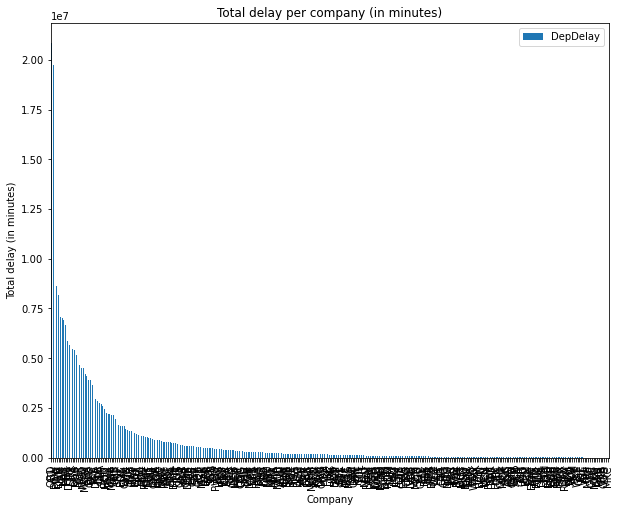

In [61]:
# # Plot total delay per company
# total_delay_per_company.plot(kind="bar", figsize=(10,8))

# plt.xlabel("Company")
# plt.ylabel("Total delay (in minutes)")

# plt.title("Total delay per company (in minutes)");

There are too many observations to draw a good conclusion. So we will observe data for the last year in our dataset, 2008.

In [54]:
target_variables = ["Origin"]+delay_variables
target_variables

['Origin',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [56]:

total_delay_per_reason_per_company = delayed_flight_df[ target_variables ].groupby([ "Origin" ]).sum()

total_delay_per_reason_per_company

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Origin,,,,,
ABE,62568.0,16037.0,82080.0,153.0,43400.0
ABI,42366.0,11057.0,17415.0,201.0,20293.0
ABQ,248755.0,33557.0,203337.0,1276.0,544625.0
ABY,24013.0,6575.0,23199.0,355.0,3379.0
ACK,2972.0,457.0,16439.0,81.0,10059.0
...,...,...,...,...,...
WYS,967.0,586.0,227.0,15.0,2193.0
XNA,184741.0,36057.0,257860.0,188.0,199511.0
YAK,2822.0,445.0,2219.0,69.0,24903.0


In [ ]:
# # Plot general mean delay of a flight per reason
# mean_of_delays_per_reason.plot(kind="bar", figsize=(10,6))

# plt.xlabel("Delay reasons")
# plt.ylabel("Mean delay (in minutes)")
# plt.title("Mean delay per reason (in minutes)")

# plt.xticks(rotation=15);

In [41]:
delayed_flight_df.head().T

,4,5,6,7,10
Year,2005,2005,2005,2005,2005
Month,1,1,1,1,1
DayofMonth,2,3,4,6,10
DayOfWeek,7,1,2,4,1
DepTime,1934,2042,2046,2110,1917
CRSDepTime,1900,1900,1900,1900,1900
ArrTime,2235,9,2357,8,2240
CRSArrTime,2232,2232,2232,2223,2223
UniqueCarrier,UA,UA,UA,UA,UA
FlightNum,542,542,542,542,542


In [42]:
# delayed_flight_df["Origin"].unique()

array(['ORD', 'BOS', 'SMF', 'SAN', 'MIA', 'SFO', 'DEN', 'DSM', 'ROC',
       'LAX', 'SEA', 'DAY', 'ALB', 'PIT', 'MDT', 'BUR', 'MHT', 'SAT',
       'SNA', 'CLT', 'GEG', 'SLC', 'BOI', 'IND', 'MCI', 'MSP', 'OAK',
       'DFW', 'PDX', 'PHL', 'ATL', 'RIC', 'MSY', 'EGE', 'SJC', 'BWI',
       'OMA', 'DCA', 'STL', 'PSP', 'ABQ', 'EWR', 'COS', 'CMH', 'LGA',
       'IAD', 'BUF', 'DTW', 'OKC', 'TUS', 'PVD', 'BDL', 'RSW', 'ANC',
       'IAH', 'AUS', 'SJU', 'CLE', 'CVG', 'ICT', 'JFK', 'HNL', 'OGG',
       'PHX', 'GUC', 'MTJ', 'KOA', 'STT', 'RNO', 'GSO', 'GRR', 'BIL',
       'BTV', 'TUL', 'FLL', 'LAS', 'MCO', 'TPA', 'ONT', 'BNA', 'JAX',
       'MYR', 'SYR', 'RDU', 'BHM', 'SAV', 'PBI', 'ORF', 'CHS', 'STX',
       'ILM', 'ABE', 'PWM', 'MKE', 'CRP', 'DAL', 'ELP', 'HOU', 'HRL',
       'ISP', 'JAN', 'LBB', 'LIT', 'MDW', 'SDF', 'AMA', 'MAF', 'GFK',
       'FSD', 'MEM', 'FAR', 'MSN', 'XNA', 'DLH', 'BTR', 'FCA', 'MBS',
       'CID', 'LAN', 'GRB', 'GPT', 'RAP', 'BZN', 'LSE', 'MOT', 'MSO',
       'BIS', 'RST',

In [57]:
# delayed_flight_df["Dest"].unique()

In [45]:
airport_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [46]:
airport_df["iata"].unique()

array(['00M', '00R', '00V', ..., 'ZPH', 'ZUN', 'ZZV'], dtype=object)

In [11]:
# Retrieve flights data are ahead of the scheduled time data
ahead_flight_df = flight_df.query("ArrDelay <0 ") 
print(ahead_flight_df.shape)
ahead_flight_df.head(10).T

,0,1,2,3,9,15,20,21,22,23
Year,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005
Month,1,1,1,1,1,1,1,1,1,1
DayofMonth,28,29,30,31,9,17,25,27,28,30
DayOfWeek,5,6,7,1,7,1,2,4,5,7
DepTime,1603,1559,1603,1556,1859,1859,1849,1859,1855,1858
CRSDepTime,1605,1605,1610,1605,1900,1900,1900,1900,1900,1900
ArrTime,1741,1736,1741,1726,2205,2202,2200,2215,2218,2212
CRSArrTime,1759,1759,1805,1759,2223,2223,2223,2223,2223,2223
UniqueCarrier,UA,UA,UA,UA,UA,UA,UA,UA,UA,UA
FlightNum,541,541,541,541,542,542,542,542,542,542


### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

